# INTELIGENCIA ARTIFICIAL

## Proyecto 1: Clasificación y Regresión Lineal

Hecho por: Juan Sebastián Clavijo Martínez<br />
TEMA: Usar el dataset sobre dígitos manuscritos (MNIST) para implementar clasificacion lineal y datos artificiales suministrados por el profesor para modelar la relación entre variables mediante regresión lineal<br />
Fecha: 16-09-2024<br />
Notas: Nada por ahora<br />
**Pontificia Universidad Javeriana**


In [39]:
# Importado de bibliotecas pertinentes

import pandas as pd  # tratamiento de datos en un dataframe
import numpy as np  # numerical python
import seaborn as sns  # biblioteca versatil para estadistica y visualizacion
import matplotlib.pyplot as plt  # biblioteca para vizualizacion de datos
from sklearn.datasets import load_digits # repo donde estan las imagenes pertinentes para la primera parte del proyecto
# imports necesarios para el punto 1.2.1
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
# imports necesarios para el punto 1.3.1
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# imports necesarios para el punto 1.4.1
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# imports necesarios para el punto 2.3.1
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## PROBLEMA 1: CLASIFICACIÓN  LINEAL

### Parte 1.1 Procesamiento de datos

In [40]:
# Parte 1.1.1: carga de datos
# se trae el dataset
digits = load_digits() #se cargan los datos con la funcion load_digits
print(digits.data.shape)
# Se imprime la forma de los datos para verificar el número de instancias y atributos.
# Según la documentación de scikit-learn (https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset),
# este dataset contiene 1797 instancias, cada una con 64 atributos, que corresponden a una imagen de 8x8 píxeles.
# según la documentacion, este dataset no tiene datos NaN o NULL, por eso no se realiza el paso 1.1.2 limpieza y preparacion de los datos

(1797, 64)


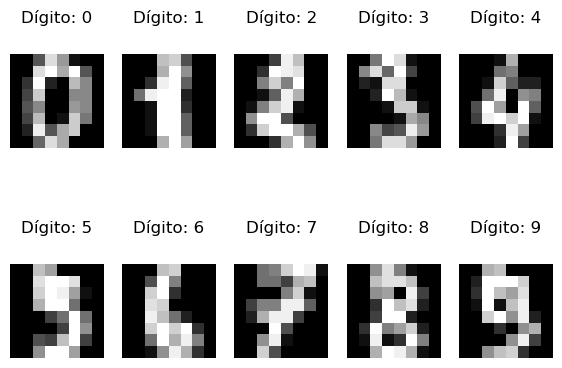

In [41]:
# Parte 1.1.2 visualización de todos los dígitos organizados
# Configurar la cuadrícula 2x5
fig, axes = plt.subplots(2, 5, figsize=(7, 5))
plt.gray()

# Mostrar cada dígito en la cuadrícula
for i, ax in enumerate(axes.flat):
    ax.matshow(digits.images[i])
    ax.set_title(f"Dígito: {digits.target[i]}")
    ax.axis("off")  #se ocultan los ejes para una visualización más limpia

plt.show()

### Análisis descriptivo de las imagenes

- Estas imagenes de los números son fáciles de entender para nosotros los humanos, pero para un computador serían un reto
- A continuación, unas notas sobre las características de algunos dígito:
  - Dígito 0: Se observa como un círculo casi cerrado con una densidad de píxeles más oscura en el centro y un contorno definido, que lo distingue claramente como un *0*.
  - Dígito 4: Debido a la manera de presentación, podría ser confundido con un 0 mal escrito
  - Dígito 5: Se puede distinguir un 5, pero la primera parte del trazo, que se parece a una *C*, debería empezar mucho mas cerca a la esquina superior derecha, es poco claro.
  - Dígito 6: Se puede distinguir un 6, pero el centro debería estar más oscuro y debería empezar más cerca a la esquina superior derecha, ya que podría ser confundido con un 1 mal escrito
- Cada dígito en el conjunto de datos MNIST está representado por una imagen pequeña y de baja resolución, lo que permite identificar patrones distintivos que los clasificadores pueden utilizar para diferenciarlos. La variación en la intensidad de los píxeles dentro de cada dígito proporciona información clave sobre la forma y el trazo del número, lo que es esencial para las tareas de clasificación.


### Parte 1.2 Implementación de clasificación con KNN

In [42]:
# Parte 1.2.1: División de los datos en entrenamiento y prueba para ambos métodos y que no haya sesgo (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, random_state=42
)

Resultados para k=1:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       0.97      1.00      0.99        34
           4       0.98      0.98      0.98        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      0.93      0.97        30
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Resultados para k=3:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00 

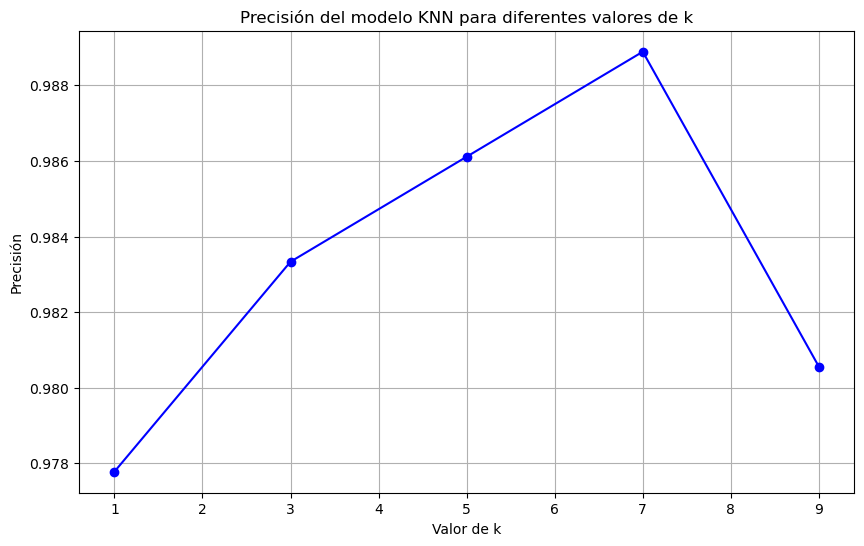

In [43]:
# Parte 1.2.2: implementacion del código

# Definimos los valores de k que queremos probar
k_values = [1, 3, 5, 7, 9]
accuracies = []

# Implementación y evaluación del modelo KNN para diferentes valores de k
for k in k_values:
    # Crear el clasificador KNN
    knn = KNeighborsClassifier(n_neighbors=k)

    # Entrenar el clasificador
    knn.fit(X_train, y_train)

    # Predecir los valores en el conjunto de prueba
    y_pred = knn.predict(X_test)

    # Evaluar el rendimiento del modelo usando precisión
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Imprimir el reporte de clasificación
    print(f"Resultados para k={k}:\n")
    print(classification_report(y_test, y_pred))
    print("=" * 60)

# Gráfico de la precisión para diferentes valores de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker="o", linestyle="-", color="b")
plt.title("Precisión del modelo KNN para diferentes valores de k")
plt.xlabel("Valor de k")
plt.ylabel("Precisión")
plt.grid(True)
plt.show()

### Parte 1.3 Implementación de clasificación con regresión logistica

In [44]:
# Parte 1.3.1  Clasificadores Binarios para cada dígito

# Crear un diccionario para almacenar los modelos
models = {}

# Entrenar un clasificador binario para cada dígito (0 a 9)
for digit in range(10):
    # Crear una etiqueta binaria para el dígito actual
    y_train_binary = (y_train == digit).astype(int)
    y_test_binary = (y_test == digit).astype(int)

    # Crear y entrenar el modelo de regresión logística
    model = LogisticRegression(max_iter=1000, solver="lbfgs")
    model.fit(X_train, y_train_binary)

    # Guardar el modelo entrenado
    models[digit] = model

    # Evaluar el modelo en el conjunto de prueba
    y_pred_binary = model.predict(X_test)
    print(f"Clasificador para el dígito {digit}:")
    print(classification_report(y_test_binary, y_pred_binary))
    print("=" * 60)

Clasificador para el dígito 0:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       327
           1       1.00      0.97      0.98        33

    accuracy                           1.00       360
   macro avg       1.00      0.98      0.99       360
weighted avg       1.00      1.00      1.00       360

Clasificador para el dígito 1:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       332
           1       0.85      1.00      0.92        28

    accuracy                           0.99       360
   macro avg       0.92      0.99      0.96       360
weighted avg       0.99      0.99      0.99       360

Clasificador para el dígito 2:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       327
           1       0.97      1.00      0.99        33

    accuracy                           1.00       360
   macro avg       0.99      1.00  

In [45]:
# Parte 1.3.2 Evaluación de cada clasificador binario para una nueva muestra y selección de la clase con la mayor probabilidad.

# Predicción sobre el conjunto de prueba usando la función de decisión
def predict_digit(models, X):
    # Obtener las probabilidades para cada clase
    probabilities = np.array(
        [model.predict_proba(X)[:, 1] for model in models.values()]
    )

    # Elegir la clase con la probabilidad más alta
    predictions = np.argmax(probabilities, axis=0)
    return predictions


# Predecir los dígitos para el conjunto de prueba
y_pred = predict_digit(models, X_test)

# Evaluar el rendimiento general
print("Evaluación general del modelo multinomial basado en clasificadores binarios:")
print(classification_report(y_test, y_pred))

Evaluación general del modelo multinomial basado en clasificadores binarios:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.90      1.00      0.95        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       1.00      0.96      0.98        46
           5       0.94      0.94      0.94        47
           6       0.94      0.97      0.96        35
           7       1.00      0.97      0.99        34
           8       0.90      0.90      0.90        30
           9       0.95      0.93      0.94        40

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



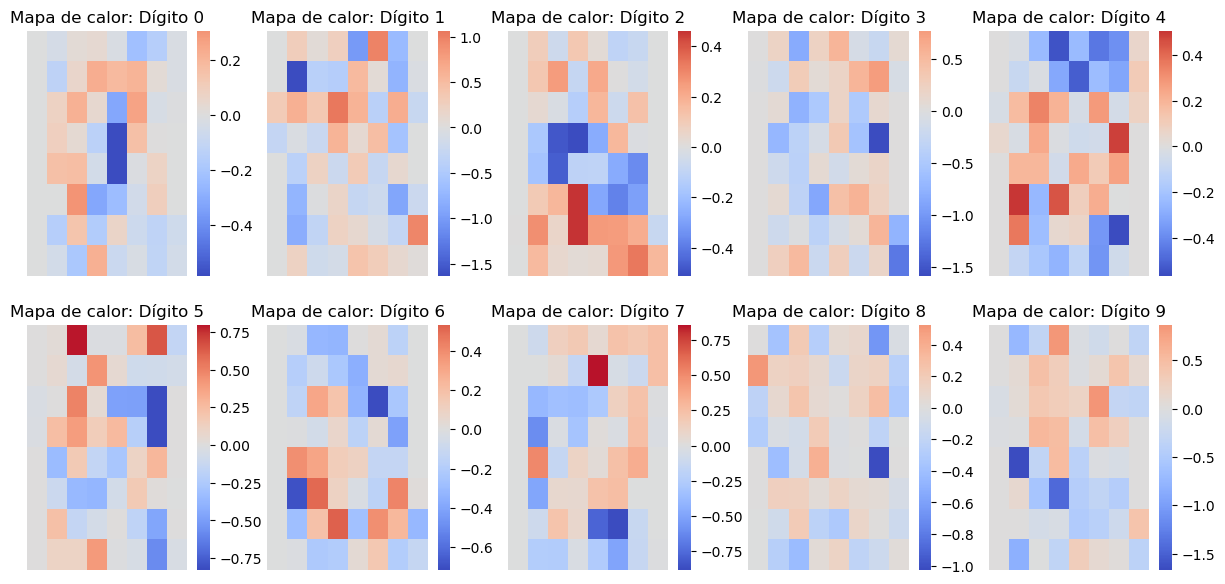

In [46]:
# Parte 1.3.3: Visualizar los pesos (θ) como un mapa de calor en una cuadrícula 2x5

# Configurar la cuadrícula 2x5
fig, axes = plt.subplots(2, 5, figsize=(15, 7))

# Iterar sobre cada modelo y su dígito correspondiente
for i, (digit, model) in enumerate(models.items()):
    # Reshape de los pesos en una matriz de 8x8
    weights = model.coef_.reshape(8, 8)

    # Seleccionar la posición de la cuadrícula
    ax = axes.flat[i]

    # Crear el mapa de calor en la posición correspondiente
    sns.heatmap(weights, annot=False, cmap="coolwarm", center=0, ax=ax)
    ax.set_title(f"Mapa de calor: Dígito {digit}")
    ax.axis("off")  # Ocultar los ejes para una visualización más limpia

# Ajustar el espaciado entre los subplots para mejor visualización
#plt.tight_layout()
plt.show()

### Parte 1.4 Implementación de clasificación multinomial

Evaluación del modelo multinomial:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.94      0.93        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



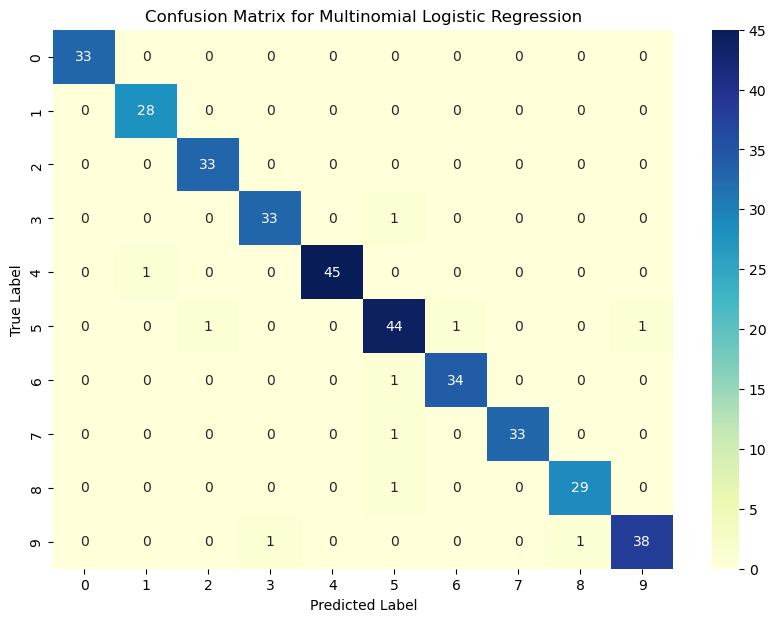

In [47]:
# Parte 1.4 Impementacion de código

# Crear y entrenar el modelo de regresión logística con opción multinomial
model_multinomial = LogisticRegression(
    max_iter=10000, solver="lbfgs", multi_class="multinomial"
)
model_multinomial.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_multinomial = model_multinomial.predict(X_test)

# Evaluar el rendimiento del clasificador multinomial
print("Evaluación del modelo multinomial:")
print(classification_report(y_test, y_pred_multinomial))

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_multinomial)

# Visualizar la matriz de confusión como un mapa de calor
plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    xticklabels=digits.target_names,
    yticklabels=digits.target_names,
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Multinomial Logistic Regression")
plt.show()

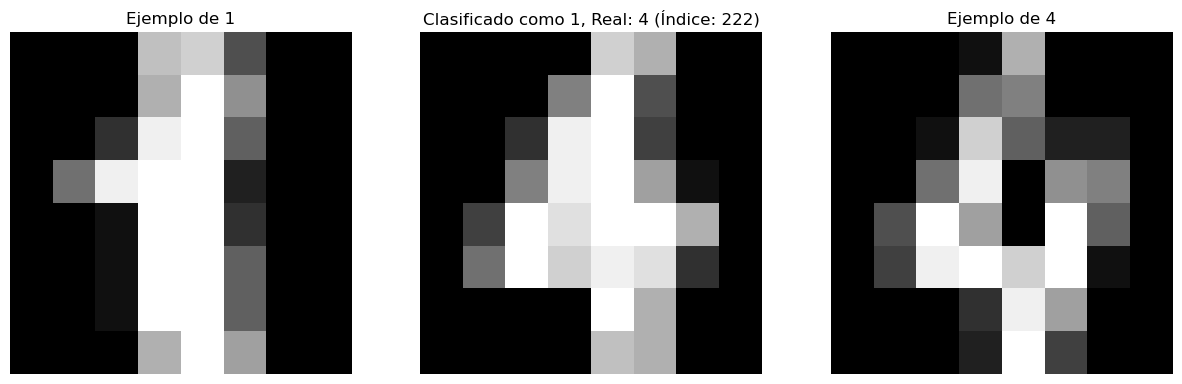

In [57]:
# Parte 1.4.1 visualización de malas clasificaciones

# Configurar la cuadrícula de 1 fila y 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(15, 10))
plt.gray()

# identificacion de la mala clasificación
misclassified_indices = np.where((y_test == 4) & (y_pred_multinomial == 1))[0]

# Mostrar un ejemplo de dígito 1 (correctamente clasificado)
axes[0].imshow(digits.images[np.where(digits.target == 1)[0][0]], cmap='gray')
axes[0].set_title("Ejemplo de 1")
axes[0].axis("off")  # Ocultar ejes para claridad

# Mostrar el dígito mal clasificado (Real: 4, Clasificado: 1)
for idx in misclassified_indices:
    axes[1].imshow(X_test[idx].reshape(8, 8), cmap="gray")
    axes[1].set_title(f"Clasificado como 1, Real: 4 (Índice: {idx})")
    axes[1].axis("off")  # Ocultar ejes

# Mostrar un ejemplo de dígito 4 (correctamente clasificado)
axes[2].imshow(digits.images[np.where(digits.target == 4)[0][0]], cmap='gray')
axes[2].set_title("Ejemplo de 4")
axes[2].axis("off") 

# Mostrar la figura completa
plt.show()

### informe de clasificación

Antes de hacer una comparación entre los diferentes resultados de clasificación, es muy importante hablar sobre la información que muestra el reporte de clasificación, presentado en esta primera parte para KNN, regresión logística y el modelo multinomial. A continuación, se presenta un resumen de los indicadores de este reporte:

1. **Precisión (Precision)**
   - **¿Qué me dice?**: La precisión indica el porcentaje de verdaderos positivos sobre todos los ejemplos que fueron clasificados como positivos. En otras palabras, de todas las predicciones que hizo el modelo para una clase, cuántas de ellas fueron correctas.
   - **¿Cómo se aplica?**: Se aplica a cada clase de la clasificación. Una precisión alta significa que el modelo comete pocos errores al clasificar una clase en particular. Es útil en situaciones donde los falsos positivos deben minimizarse.

2. **Exhaustividad (Recall)**
   - **¿Qué me dice?**: La exhaustividad, también conocida como sensibilidad, indica el porcentaje de verdaderos positivos sobre todos los ejemplos que realmente pertenecen a la clase positiva. Mide la capacidad del modelo para encontrar todos los positivos.
   - **¿Cómo se aplica?**: Este indicador es particularmente importante en contextos donde es crucial identificar todos los ejemplos positivos, aunque se permitan algunos falsos positivos. Un alto valor de exhaustividad asegura que no se pierden muchos positivos.

3. **F1-Score**
   - **¿Qué me dice?**: El F1-Score es la media armónica entre la precisión y la exhaustividad. Proporciona una métrica equilibrada que combina ambos aspectos, especialmente cuando hay una distribución desigual de clases o un interés en tener en cuenta tanto la precisión como la exhaustividad.
   - **¿Cómo se aplica?**: Se utiliza cuando se necesita un equilibrio entre precisión y exhaustividad, en situaciones donde no se puede priorizar uno sobre el otro. Es útil en modelos con datos desequilibrados.

4. **Soporte (Support)**
   - **¿Qué me dice?**: El soporte indica el número total de ocurrencias de cada clase en los datos de prueba. Es simplemente la cantidad de ejemplos reales que pertenecen a cada clase.
   - **¿Cómo se aplica?**: Muestra cuántos ejemplos de una clase específica están presentes, proporcionando contexto sobre la frecuencia de cada clase en el conjunto de datos. Ayuda a interpretar los otros indicadores según el tamaño de cada clase.

5. **Exactitud (Accuracy)**
   - **¿Qué me dice?**: La exactitud mide el porcentaje de predicciones correctas sobre el total de predicciones hechas por el modelo. Es una métrica global del desempeño.
   - **¿Cómo se aplica?**: Se aplica al modelo completo y es útil cuando las clases están equilibradas. Sin embargo, en problemas con clases desbalanceadas, puede no ser suficiente por sí sola para evaluar el rendimiento real del modelo.


### Comparación de resultados

Conociendo los principales indicadores del reporte de clasificación, ahora se procede a hablar sobre los resultados de cada método de clasificación: el primero, KNN, según la gráfica muestra una precisión bastante alta, en todos los k, mayor al 0.970. para la regresión logistica, para cada dígito la presición no baja de 0.83. Para el modelo de clasificadores binarios la presición mas baja es, parecida a los modelos anteriores y no baja del 0.94 y para el modelo multinomial, la presicion mas baja es de 0.97. Esto indica que los modelos de clasificación usados pueden separar correctamente los dígitos del dataset dado. En un momentó el autor de este código consideró que debido a estos valores altos en general, los clasificadores estaban sobre ajustando, luego de una consulta al profesor, estos valores presentados son correspondientes a lo que se conoce sobre el dataset.

Es importante también mencionar la visualización de la clasificación inadecuada mostrada en el numeral 1.4.1, las posibles razones detrás de este desliz por parte del clasificador multinomial pueden ser la forma del 4 de la mitad y como el espacio de la izquierda se asemeja bastante al del 1, también que el trazo final de la derecha con el que se dibujaría el 4 de la mitad no es tan pronunciado como en el ejemplo y tiene solo 3 pixeles dedicados a terminar el trazo. 

## Preguntas de aprendizaje

1. ¿Qué influencia tiene el uso de diferentes valores de K en el clasificador KNN?<br />
R = El uso de diferentes valores para *k* en la implementación de KNN implica mejor precisión, en otras palabras, hace que los verdaderos positivos sean efectivamente clasificados como positivos hasta un punto. Al parecer, para este dataset el valor óptimo para lograr el mejor equilibrio entre precisión y robustez en los datos usados es *k* = 7.

2. ¿Qué diferencias hay entre el clasificador utilizando KNN y regresión logística? ¿Funciona uno mejor que otro?, ¿Por qué?<br />
R = La principal diferencia entre KNN y regresión logística es que regresión logística, para ser entrenada, usa gradiente descendiente; por otro lado, KNN no tiene un entrenamiento como tal, el rendimiento y métrica principal están basados en la distancia (la distancia por defecto es euclidiana, pero hay más). El parámetro clave de KNN es *K*, el número de elementos cercanos, que podrían llamarse vecinos, que se tendrán en cuenta al clasificar un nuevo punto. Para poder afirmar que uno funciona mejor que otro, es necesario mirar el contexto de los datos, ya que diferentes clasificadores manejan mejor ciertos volúmenes de datos. KNN es mejor cuando hay distribuciones complejas o no lineales; regresión logística es más adecuada con problemas lineales o con conjuntos de datos muy grandes, ya que KNN, según lo visto en clase, es computacionalmente costoso a medida que los datos crecen. Para este dataset específicamente, según los reportes de clasificación, es posible afirmar que KNN tiene un mejor rendimiento general y es más consistente en todas las clases, especialmente con *K*=5 o *K*=7. Regresión logística es efectiva, pero presenta dificultades en algunas clases, como los dígitos 1 y 8.

3. ¿El clasificador de regresión logística presenta un buen rendimiento? ¿Cómo evalúan su rendimiento? ¿Si el rendimiento no es bueno qué cree se debe hacer para mejorarlo?<br />
R = El clasificador de regresión logística presenta un buen rendimiento, ya que tiene una precisión cercana al 100% en la mayoría de las clases. Su rendimiento se evalúa mediante métricas como la precisión, recall y el f1-score, los cuales reflejan su capacidad para clasificar correctamente los datos. Sin embargo, en algunas clases, como los dígitos 1 y 8, el rendimiento es menor, posiblemente debido a un desbalance en los datos o la falta de complejidad en el modelo. Para mejorar, se podría ajustar el modelo utilizando técnicas como la regularización, recolectar más datos o aplicar métodos de balanceo de clases.

4. Al realizar el mapa de calor con los pesos de la regresión logística, para los diferentes clasificadores, ¿Qué puede notar? ¿Hay algún tipo de patrón?, ¿Sí, no, por qué?<br />
R = En el mapa de calor, observándolo algo de lejos, todos los dígitos en conjunto, como se presentan en la gráfica, se pueden distinguir los dígitos originales. El patrón que se aprecia es que los dígitos se destacan más en tonos rojizos, lo que sugiere que estas áreas corresponden a coeficientes positivos, mientras que las áreas en tonos azulados representan coeficientes negativos. Esto refleja las zonas más relevantes para la clasificación de cada dígito en la regresión logística.

5. ¿Qué puede concluir al final de este proyecto?, escriba su opinión frente a los métodos de clasificación y cómo se aplicó en este proyecto.<br />
R = Se puede concluir que los métodos de clasificación se adaptan muy bien a problemas complejos y pueden ser precisos, exhaustivos y exactos a la hora de enfrentarse a una tarea compleja para un computador, como discriminar dígitos manuscritos. Opino que los métodos de clasificación me sorprendieron gratamente, ya que no creía que iban a ser tan precisos porque, inclusive para humanos, distinguir algunos dígitos a mano puede resultar una tarea ciertamente compleja.


## PROBLEMA 2: Regresión Lineal

### Parte 2.1 procesamiento de datos

In [ ]:
# Parte 2.1.1: carga de datos
# se trae el dataset
# Aunque nos proporcionaron el archivo.csv y viene en la carpeta de este proyecto, decidí colgarlo en github para más
# comodidad y por si algo le pasa, que pueda ser facilmente traído a través de internet
url = "https://raw.githubusercontent.com/jclavijomartinez/IA2430/master/Proyecto1/RegressionData.csv" 
# se hace el obj dataframe
df_artif = pd.read_csv(url) # Se llama asi porque la base de datos es artificial
# se presentan los primeros 5 renglones
df_artif.head(5)

In [ ]:
# Parte 2.1.2: limpieza y preparación de los datos (cuenta de datos null, NaN, etc. y limpieza)
desaparecidos = len(df_artif) - len(df_artif.dropna())
Cantidad = len(df_artif)
print("Cantidad de datos observados con datos NaN", desaparecidos)
print("Cantidad de datos duplicados", df_artif.duplicated().sum())
##se eliminan los datos Null y Duplicados
df_artif.dropna(inplace=True)
df_artif.drop_duplicates(inplace=True)
# Se reinicia el indice por los elementos eliminados
df_artif.reset_index(drop=True, inplace=True)

### Parte 2.2 Analisis de los datos

A continuación se usan los comandos [df].info() y [df].describe() para presentar informacion clave sobre el dataframe, posteriormente se grafican las distribuciones de las variables y se procede a hacer un analisis descriptivo de los datos

In [ ]:
# Parte 2.2.1 presentacion del df_artif

df_artif.info()

In [ ]:
df_artif.describe()

In [ ]:
# Se graffican las variables en un histograma para visualizar mejor su distribución

# Crear la figura y los subplots, con 1 fila y 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# Histograma para X1
axes[0].hist(df_artif["X1"], bins=30, color="blue", alpha=0.7)
axes[0].set_title("Distribución de X1")
axes[0].set_xlabel("X1")
axes[0].set_ylabel("Frecuencia")

# Histograma para X2
axes[1].hist(df_artif["X2"], bins=30, color="green", alpha=0.7)
axes[1].set_title("Distribución de X2")
axes[1].set_xlabel("X2")
axes[1].set_ylabel("Frecuencia")

# Histograma para y
axes[2].hist(df_artif["y"], bins=30, color="red", alpha=0.7)
axes[2].set_title("Distribución de y")
axes[2].set_xlabel("y")
axes[2].set_ylabel("Frecuencia")

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()

### Análisis descriptivo:

Según la información mostrada arriba, se puede hablar más a profundidad sobre los datos, 

### Parte 2.3 implementación de regresión lineal

In [ ]:
# Parte 2.3.1 Implementacion de regresion lineal

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df_artif[["X1", "X2"]]
y = df_artif["y"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir los valores de y en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Gráficas

# Gráfico de valores reales vs valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "--", color="red")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Valores Reales vs. Valores Predichos")
plt.show()

# Graficar la relación entre X1, X2 y y
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(X_test["X1"], y_test, label="Real", alpha=0.7)
ax[0].scatter(X_test["X1"], y_pred, label="Predicho", alpha=0.7, color="red")
ax[0].set_xlabel("X1")
ax[0].set_ylabel("y")
ax[0].set_title("Relación entre X1 e y")
ax[0].legend()

ax[1].scatter(X_test["X2"], y_test, label="Real", alpha=0.7)
ax[1].scatter(X_test["X2"], y_pred, label="Predicho", alpha=0.7, color="red")
ax[1].set_xlabel("X2")
ax[1].set_ylabel("y")
ax[1].set_title("Relación entre X2 e y")
ax[1].legend()

plt.show()

In [37]:
#QUE transformacion hay que hacer? para poder, ambas tienen una transformacion no lineal, despues de transf lineal

## Preguntas de aprendizaje

1. ¿Cómo evaluarón que la regresión fuera adecuada?<br />
R =
2. ¿Realizarón algún tipo de transformación no lineal a los datos de entrada? Si fue así, ¿Qué transformación realizarón y por qué?<br />
R = 
3. ¿Considera que los resultados obtenidos son adecuados, o se pueden mejorar?<br />
R = 
4. ¿Qué puede concluir al final de este proyecto?, escriba su opinión frente a los metodos de regresión lineal y como se aplicó en este proyecto.<br />
R = 